# 1. Data Loading 🔃

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [3]:
FINtest=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
train=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
Ytrain=train['target']
train.drop(['target'],inplace=True,axis=1)
sample_sub=pd.read_csv('/kaggle/input/System-Threat-Forecaster/sample_submission.csv')
currentColList=train.columns

In [4]:
train

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,25740.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,20900.0,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,51605.0,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,18669.0,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08


---
---

# 2. EDA 🔬

---
## 2.1 Scaning the dataset 🔍

In [5]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,0.0,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,0.0,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


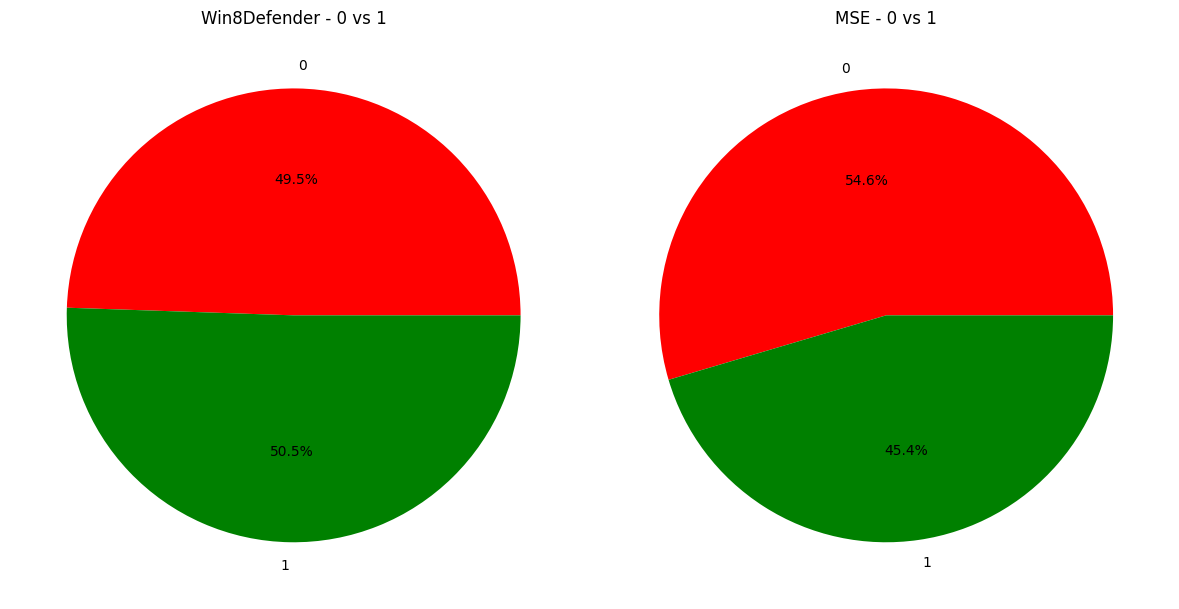

In [6]:
win8_counts = Ytrain[train[train["ProductName"] == "win8defender"].index].value_counts().sort_index()
mse_counts = Ytrain[train[train["ProductName"] == "mse"].index].value_counts().sort_index()

color_map = {0: "red", 1: "green"}

win8_colors = [color_map[i] for i in win8_counts.index]
mse_colors = [color_map[i] for i in mse_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(win8_counts, labels=win8_counts.index, autopct='%1.1f%%', colors=win8_colors)
axes[0].set_title("Win8Defender - 0 vs 1")

axes[1].pie(mse_counts, labels=mse_counts.index, autopct='%1.1f%%', colors=mse_colors)
axes[1].set_title("MSE - 0 vs 1")

plt.tight_layout()
plt.show()

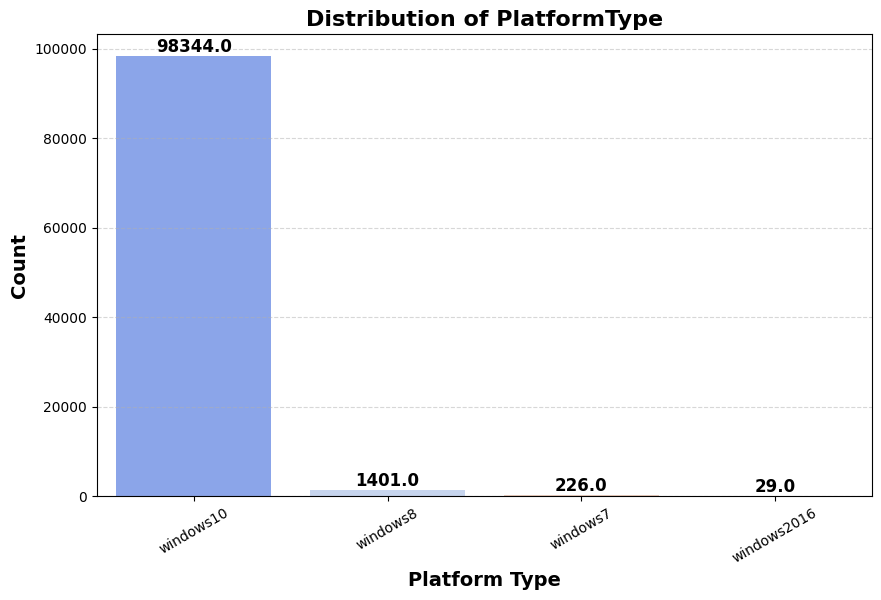

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train["PlatformType"], palette="coolwarm")

plt.xlabel("Platform Type", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Distribution of PlatformType", fontsize=16, fontweight="bold")

# Add values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


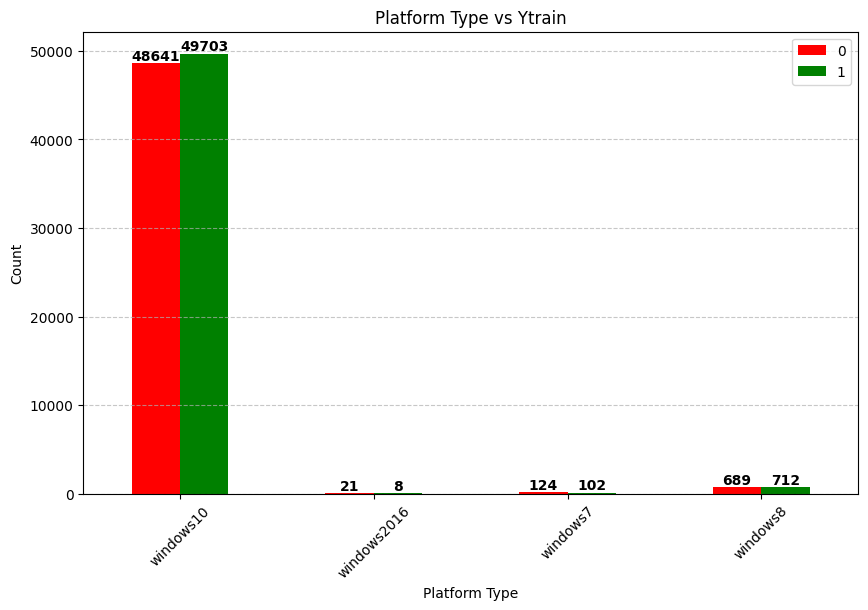

In [8]:
df = pd.DataFrame({"PlatformType": train["PlatformType"], "Target": Ytrain})

platform_counts = df.groupby(["PlatformType", "Target"]).size().unstack()

ax = platform_counts.plot(kind="bar", figsize=(10, 6), color=["red", "green"])
plt.xlabel("Platform Type")
plt.ylabel("Count")
plt.title("Platform Type vs Ytrain")
plt.legend(["0", "1"])

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [9]:
print("Train:",train.shape,Ytrain.shape)
print("Final Test:",FINtest.shape)

Train: (100000, 75) (100000,)
Final Test: (10000, 75)


---

## 2.2 target distribution Balance ⚖️

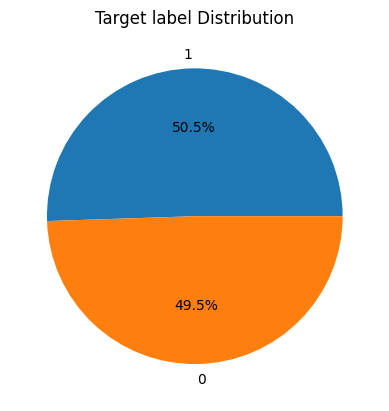

In [10]:
dist=Ytrain.value_counts()
plt.pie(dist,labels=dist.index,autopct='%1.1f%%')
plt.title("Target label Distribution")
plt.show()
#its pretty balanced

### we are dealing with a pretty balanced training data

---

## 2.3 Null Value Stats 📊

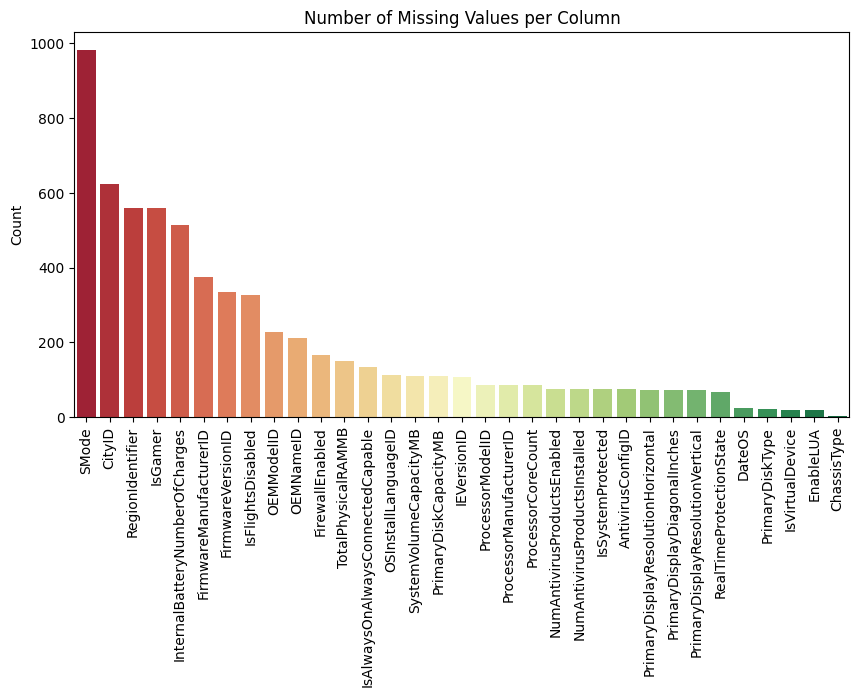

33 out of total 75 columns


In [11]:
missing_counts = train.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]  
tot=len(missing_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="RdYlGn")
plt.xticks(rotation=90)
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.show()

print(f"{tot} out of total {len(currentColList)} columns" )


### There are ```33``` columns with null values out of ```75``` original columns

---

## 2.4 User side virus prevention 🕵️‍♂️

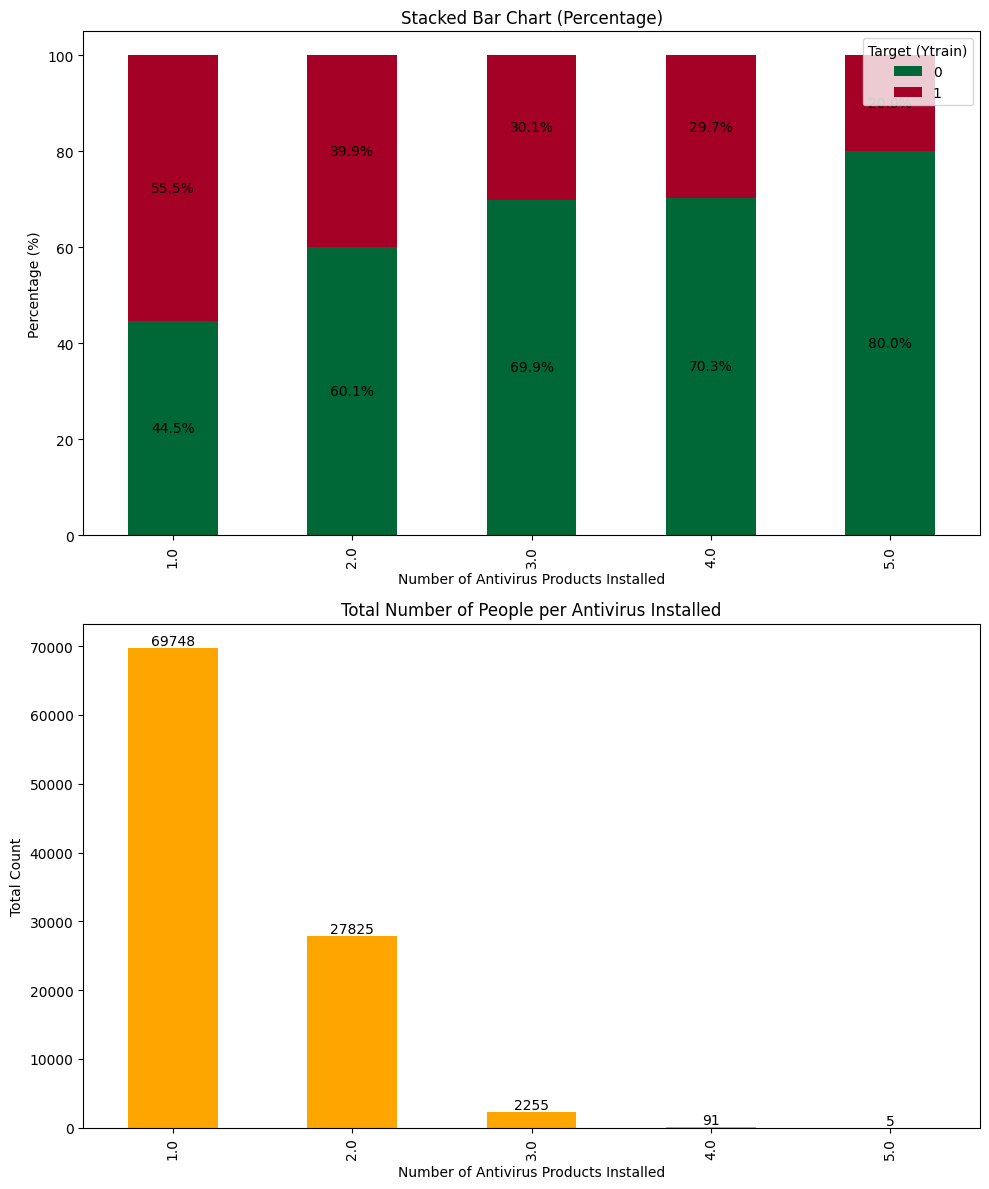

In [12]:
counts = train.groupby(['NumAntivirusProductsInstalled', Ytrain]).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100 
total_counts = counts.sum(axis=1)  

fig, axes = plt.subplots(2, 1, figsize=(10, 12)) 

# Stacked Percentage Bar Chart 
percentages.plot(kind="bar", stacked=True, colormap="RdYlGn_r", ax=axes[0])
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Number of Antivirus Products Installed")
axes[0].set_title("Stacked Bar Chart (Percentage)")
axes[0].legend(title="Target (Ytrain)")

# Adding percntage labels
for i, bars in enumerate(axes[0].containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid labeling 0% sections
            axes[0].text(bar.get_x() + bar.get_width()/2, 
                         bar.get_y() + height / 2, 
                         f"{height:.1f}%", 
                         ha='center', va='center', fontsize=10, color='black')

# Total Bar Chart 
total_counts.plot(kind="bar", color="orange", ax=axes[1])
axes[1].set_ylabel("Total Count")
axes[1].set_xlabel("Number of Antivirus Products Installed")
axes[1].set_title("Total Number of People per Antivirus Installed")


for i, txt in enumerate(total_counts):
    axes[1].text(i, txt, str(txt), ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


### It is observed that to an *extent anti more virus software the client uses , less likely they are to get attacked by virus

---

## 2.5 Data type Split in training set 🛞

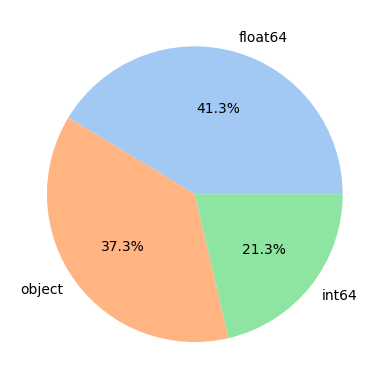

In [13]:
dtype_counts=train.dtypes.value_counts()
plt.pie(dtype_counts, labels=dtype_counts.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.show()

---
## HEATMAP 🔥

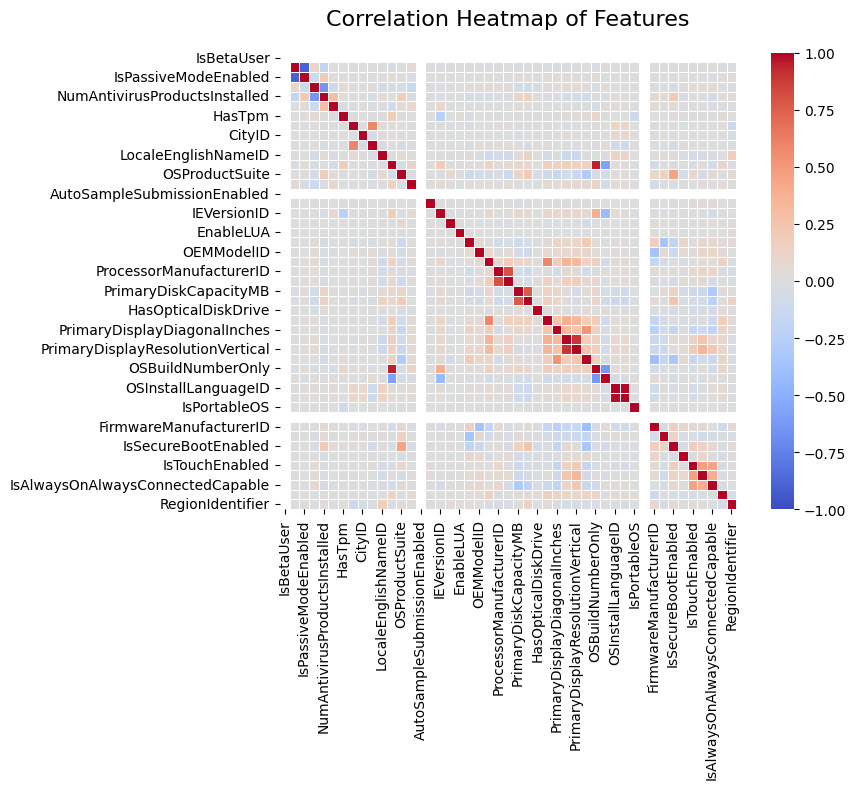

In [14]:
# Compute correlation matrix
correlation_matrix = train.select_dtypes(include=["number"]).corr()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',  
            vmin=-1, vmax=1,  
            center=0,  
            square=True,  
            linewidths=0.5,  
            fmt='.2f',  
            ax=ax)  

# Customize the plot
ax.set_title('Correlation Heatmap of Features', pad=20, size=16)
plt.tight_layout()

# Display the plot
plt.show()





In [15]:
FINtest=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
train=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
Ytrain=train['target']
train.drop(['target'],inplace=True,axis=1)
sample_sub=pd.read_csv('/kaggle/input/System-Threat-Forecaster/sample_submission.csv')
currentColList=train.columns
# Compute correlation matrix
corr_matrix = train.select_dtypes(include=["number"]).corr().abs()

# Create an empty list to store highly correlated features
high_corr_features = []

# Iterate through correlation matrix to find highly correlated features
for row in corr_matrix.columns:
    for col in corr_matrix.index:
        if row != col and corr_matrix.loc[row,col] > 0.9:  # Avoid diagonal
            high_corr_features.append([row,col])
            break  # Remove only one of each correlated pair

unique_pairs = set(tuple(sorted(pair))[1] for pair in high_corr_features)
# Remove duplicates from the list
high_corr_features = unique_pairs


print(f"Found {len(high_corr_features)} highly correlated features to remove: {high_corr_features}")

# Print original shapes
print(f"Original train shape: {train.shape}")
print(f"Original FINTest shape: {FINtest.shape}")

# Drop highly correlated features
train.drop(columns=high_corr_features, inplace=True)
FINtest.drop(columns=high_corr_features, inplace=True)

# Print new shapes
print(f"New train shape: {train.shape}")
print(f"New FINTest shape: {FINtest.shape}")


Found 3 highly correlated features to remove: {'OSBuildNumberOnly', 'OSUILocaleID', 'RealTimeProtectionState'}
Original train shape: (100000, 75)
Original FINTest shape: (10000, 75)
New train shape: (100000, 72)
New FINTest shape: (10000, 72)


---
## 2.6 Very Low Variance => Insignificatant 🤏   

In [16]:
# Compute variance for numerical columns
variances = train.select_dtypes(include=["number"]).var()


# Find columns with variance less than 0.1
low_var_columns = variances[variances < 0.1].index.tolist()

print(f"Total Low variance Columns:{len(low_var_columns)}")
print(f"low variance features to remove: {low_var_columns}")



Total Low variance Columns:15
low variance features to remove: ['IsBetaUser', 'IsPassiveModeEnabled', 'NumAntivirusProductsEnabled', 'HasTpm', 'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode', 'FirewallEnabled', 'EnableLUA', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsFlightsDisabled', 'IsVirtualDevice', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable']


In [17]:
# Droping these low var columns from both train and FINTest inplace
train.drop(columns=low_var_columns, inplace=True)
FINtest.drop(columns=low_var_columns, inplace=True)
newshape=train.shape
print(f"New shape: {train.shape}")

New shape: (100000, 57)


### 15 Columns gone , snapped into dust 🫰
---

## 2.7 Dropping Id Column

In [18]:
train.nunique().sort_values(ascending=False).head()

MachineID                 99835
SystemVolumeCapacityMB    46188
CityID                    16047
OEMModelID                15952
FirmwareVersionID         12299
dtype: int64

#### MachineID is just a machiine id , it gives no meaning to the end result

In [19]:
# drop MachineID, since id doesnt make sense in giving any details
train.drop(columns=["MachineID"],inplace=True,axis=1)
FINtest.drop(columns=["MachineID"],inplace=True,axis=1)

In [20]:
train.shape[1],FINtest.shape[1]

(56, 56)


---

## 3. Train test split 🪓

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(
    train,Ytrain,test_size=0.2,
    stratify=Ytrain, random_state=42)

In [22]:
Xtrain.shape,Xtest.shape

((80000, 56), (20000, 56))

# 3. The PreProcess🤖


In [23]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline

num=Xtrain.select_dtypes(include=['int64','float64'])
cat=Xtrain.select_dtypes(include=['object'])

#dates as difference
def dateFun(dates):
    AS=pd.to_datetime(dates.iloc[:,0], format="%Y-%m-%d %H:%M:%S")
    OS=pd.to_datetime(dates.iloc[:,1], format="%Y-%m-%d")

    DateDiff = (AS-OS).dt.days

    
    # Extracting components
    AttackMonth = AS.dt.month
    AttackDay = AS.dt.dayofweek
    AttackHour = AS.dt.hour
    AttackYear = AS.dt.year
    UpdateMonth = OS.dt.month
    UpdateDay = OS.dt.dayofweek
    UpdateYear = OS.dt.year
    
    # Creating the DataFrame correctly
    newDates = pd.DataFrame({
        'AttackMonth': AttackMonth,
        'AttackDay': AttackDay,
        'AttackHour': AttackHour,
        'AttackYear': AttackYear,
        'UpdateMonth': UpdateMonth,
        'UpdateDay': UpdateDay,
        'UpdateYear': UpdateYear,
        "DateDiff":DateDiff
    })
    
    return newDates

numCols=num.columns.to_list()
#remove dates from category 
cols_to_remove = {'DateAS', 'DateOS'}
catCols = list(set(cat.columns.to_list()) - cols_to_remove)
#categorical data
catUniq=cat.nunique()
OHECols=catUniq[catUniq<=15].keys().to_list()
OrdCols=catUniq[catUniq>15].keys().to_list()
    
#imputer

numPipe=Pipeline([
    ('numimp',SimpleImputer()),
])

onehot_pipe = Pipeline([
    ('catimp', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

ordinal_pipe = Pipeline([
    ('catimp', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

datePipe= Pipeline([
    ('datediff',FunctionTransformer(dateFun)),
    ('dateimp',SimpleImputer(strategy="most_frequent")),
])

preTransformer=ColumnTransformer(transformers=[
    ('numberPipe',numPipe,numCols),
    ('datePipe',datePipe,['DateAS','DateOS']),
    ('OHEPipe', onehot_pipe, OHECols),
    ('OrdinalPipe', ordinal_pipe, OrdCols),
],
    remainder='passthrough' 
)

In [24]:
preTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numberPipe',
                                 Pipeline(steps=[('numimp', SimpleImputer())]),
                                 ['AntivirusConfigID',
                                  'NumAntivirusProductsInstalled', 'CountryID',
                                  'CityID', 'GeoRegionID',
                                  'LocaleEnglishNameID', 'OSBuildNumber',
                                  'OSProductSuite', 'IEVersionID', 'OEMNameID',
                                  'OEMModelID', 'ProcessorCoreCount',
                                  'ProcessorManufacturerID', 'Proce...
                                  'LicenseActivationChannel', 'FlightRing']),
                                ('OrdinalPipe',
                                 Pipeline(steps=[('catimp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['EngineVersion', 'AppVersion',
                                  'SignatureVersion', 'OSBuildLab',
                                  'ChassisType', 'NumericOSVersion',
                                  'OSEdition', 'OSSkuFriendlyName', 'DateAS',
                                  'DateOS'])])

In [25]:
Xtrain.shape

(80000, 56)

In [26]:
preproTrain=preTransformer.fit_transform(Xtrain)
preproTrain.shape

(80000, 153)

In [27]:
preproTrain

array([[5.3447e+04, 1.0000e+00, 1.6000e+02, ..., 1.0000e+00, 2.3340e+03,
        7.7000e+01],
       [5.3447e+04, 1.0000e+00, 1.9000e+01, ..., 1.1000e+01, 2.5200e+03,
        7.9000e+01],
       [5.3447e+04, 1.0000e+00, 2.0100e+02, ..., 1.0000e+00, 1.8400e+03,
        9.5000e+01],
       ...,
       [5.3447e+04, 1.0000e+00, 2.0700e+02, ..., 1.0000e+00, 2.2090e+03,
        9.8000e+01],
       [4.7238e+04, 2.0000e+00, 1.5800e+02, ..., 4.0000e+00, 2.5000e+03,
        7.9000e+01],
       [5.3447e+04, 1.0000e+00, 4.1000e+01, ..., 4.0000e+00, 2.0390e+03,
        8.4000e+01]])

#### OHE made my 56 columns into 152 (intentional, it makes me sad but it is necessary 🥲)

## 👩‍🔧 pipe pipe pipe

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, FunctionTransformer


# Define pipeline
variance = VarianceThreshold(threshold=0.1)
cleanPipeline = Pipeline(steps=[
    ('preprocessor', preTransformer),
    ('stdscl', StandardScaler())
])

# Transform data
CleanedData = cleanPipeline.fit_transform(Xtrain)

cleanedtestData=cleanPipeline.transform(Xtest)


In [29]:
print(f"Xtrain cols: {Xtrain.shape[1]}")
print(f"Cleaned and Pipelined cols: {CleanedData.shape[1]}, reduced from there because of variance thershold again")


Xtrain cols: 56
Cleaned and Pipelined cols: 153, reduced from there because of variance thershold again


# 4. Model Selection 🛒

## 4.1 XGBoost (0.6234) ⏩

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgbmodel = xgb.XGBClassifier()  # or XGBClassifier for classification
xgbmodel.fit(CleanedData, Ytrain)
# Predict on the test set

xgb__y_pred = xgbmodel.predict(cleanedtestData)

# Evaluate the model
accuracy = accuracy_score(Ytest, xgb__y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(Ytest, xgb__y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, xgb__y_pred))

Test Accuracy: 0.6234

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000


Confusion Matrix:
[[5838 4057]
 [3474 6631]]


| |+ |- |
|-|--|--|
|+|TP|FP|
|-|FN|TN|

## 4.2 Random forest (0.6164) 🌴🌲🎄

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier()  # Random Forest classifier
rf_model.fit(CleanedData, Ytrain)

# Predict on the test set
rf__y_pred = rf_model.predict(cleanedtestData)

# Evaluate the model
accuracy = accuracy_score(Ytest, rf__y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(Ytest, rf__y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, rf__y_pred))

Test Accuracy: 0.6133

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      9895
           1       0.62      0.63      0.62     10105

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000


Confusion Matrix:
[[5935 3960]
 [3774 6331]]


## 4.3 LightGBM (62.76)⚡

In [32]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(CleanedData, Ytrain)

# Predict on the test set
lgb_y_pred = lgb_model.predict(cleanedtestData)

# Evaluate the model
accuracy = accuracy_score(Ytest, lgb_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Ytest, lgb_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, lgb_y_pred))


[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5054
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
Test Accuracy: 0.6276

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.67      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000


Confusion Matrix:
[[5799 4096]
 [3353 6752]]


## 4.4 SGD(58.15) 🗿

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a pipeline with StandardScaler (SGD is sensitive to feature scaling)
sgd_model = make_pipeline(StandardScaler(), SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42))

# Train the model
sgd_model.fit(CleanedData, Ytrain)

# Predict on the test set
sgd_y_pred = sgd_model.predict(cleanedtestData)

# Evaluate the model
accuracy = accuracy_score(Ytest, sgd_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Ytest, sgd_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, sgd_y_pred))

Test Accuracy: 0.5815

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      9895
           1       0.58      0.64      0.61     10105

    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000


Confusion Matrix:
[[5159 4736]
 [3634 6471]]


## 4.5 Ada booost (61.28) 💣

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(CleanedData, Ytrain)

# Predict on the test set
ada_y_pred = ada_model.predict(cleanedtestData)

# Evaluate the model
accuracy = accuracy_score(Ytest, ada_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Ytest, ada_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, ada_y_pred))


Test Accuracy: 0.6128

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.59      9895
           1       0.61      0.67      0.64     10105

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000


Confusion Matrix:
[[5463 4432]
 [3313 6792]]


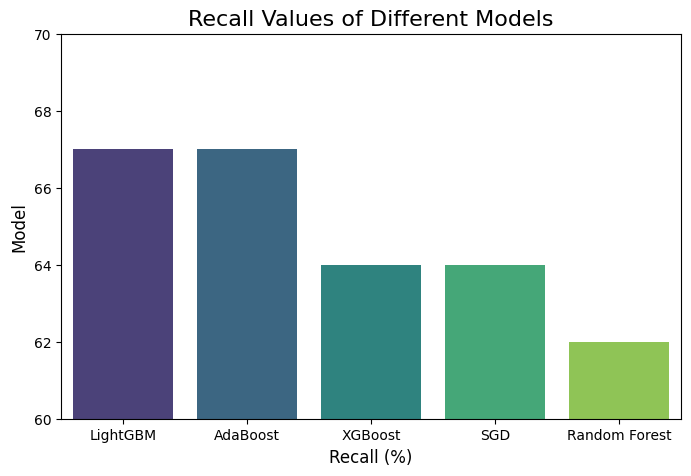

In [35]:


# Step 1: Organize the data
data = {
    "Model": ["XGBoost", "Random Forest", "LightGBM", "SGD", "AdaBoost"],
    "Recall": [64, 62, 67, 64, 67]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Sort the data by Recall values in descending order
df_sorted = df.sort_values(by="Recall", ascending=False)

# Step 3: Create the Seaborn bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sorted, y="Recall", x="Model", palette="viridis")

# Add labels and title
plt.title("Recall Values of Different Models", fontsize=16)
plt.xlabel("Recall (%)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.ylim(60,70)

plt.show()

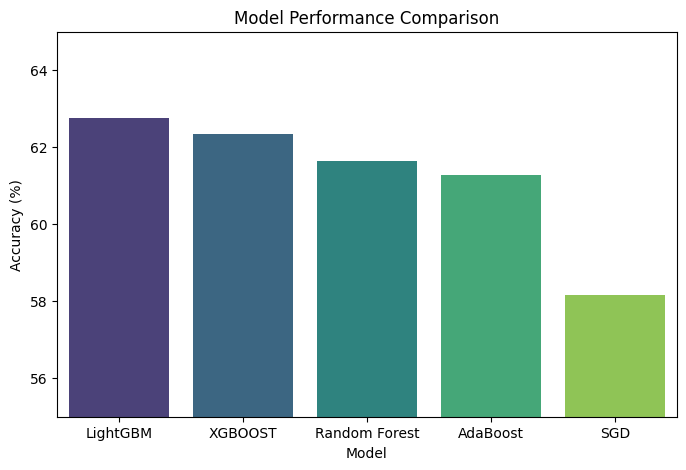

In [36]:
data = {
    'Model': ['XGBOOST', 'Random Forest', 'LightGBM', 'SGD', 'AdaBoost'],
    'Accuracy': [62.34, 61.64, 62.76, 58.15, 61.28]
}

# Create DataFrame
df = pd.DataFrame(data).sort_values(by="Accuracy",ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')
plt.ylim(55, 65)
plt.show()

In [37]:
ada_y_prob = ada_model.predict_proba(cleanedtestData)
ada_y_prob

array([[0.49757039, 0.50242961],
       [0.50485949, 0.49514051],
       [0.4965441 , 0.5034559 ],
       ...,
       [0.5018639 , 0.4981361 ],
       [0.49720271, 0.50279729],
       [0.50003803, 0.49996197]])

## 🏆 **The Undisputed, Undefeated Lightweight Champion!** 🏆  

🎯 **An accuracy of 62.76%**  

🎯 **An Recall of 67%**  

💥 **It's none other than...**  

# ⚡ **LIGHT GRADIENT BOOSTING MACHINE (LGBM)** ⚡  


# 5. Feature Selection 🛍

In [38]:
from sklearn.feature_selection import SelectFromModel

# Feature selection based on importance
selector = SelectFromModel(lgb_model, threshold="median", prefit=True)
selectedXTrain = selector.transform(CleanedData)
selectedXTest = selector.transform(cleanedtestData)
selectedXTrain.shape

(80000, 88)

In [39]:
print("before",CleanedData.shape)
print("After feture Selection",selectedXTrain.shape)

before (80000, 153)
After feture Selection (80000, 88)


## reduced almost half of the features 152 --> 76

In [40]:
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(selectedXTrain, Ytrain)

# Predict on the test set
lgb_y_pred = lgb_model.predict(selectedXTest)

# Evaluate the model
accuracy = accuracy_score(Ytest, lgb_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Ytest, lgb_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, lgb_y_pred))

[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4889
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
Test Accuracy: 0.6271

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000


Confusion Matrix:
[[5831 4064]
 [3394 6711]]


## Before select best we had accuracy of 62.76, now we have 62.71, the accuracy is almost maintained while reducing the columns count significantly
### 99% captured

## 6. Hyper Parameter tuning

In [41]:
# import time
# import lightgbm as lgb
# from sklearn.model_selection import RandomizedSearchCV

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500, 1000],  
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  
#     'num_leaves': [31, 50, 100, 150],  # Controls model complexity  
#     'max_depth': [-1, 5, 10, 15],  # Tree depth (-1 means no limit)  
#     'min_child_samples': [10, 20, 30, 50],  # Minimum data in leaf  
#     'subsample': [0.6, 0.8, 1.0],  
#     'colsample_bytree': [0.6, 0.8, 1.0],  
#     'reg_alpha': [0, 0.1, 1, 10],  # L1 regularization  
#     'reg_lambda': [1, 10, 100],  # L2 regularization  
# }

# # Initialize LightGBM model
# lgb_model = lgb.LGBMClassifier()

# # Setup RandomizedSearchCV
# rand_search = RandomizedSearchCV(
#     lgb_model, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy',
#     n_jobs=-1, verbose=3, random_state=42
# )

# # Measure execution time
# start_time = time.time()
# rand_search.fit(selectedXTrain, Ytrain)
# end_time = time.time()

# # Compute execution time
# total_time = end_time - start_time
# avg_time_per_iter = total_time / (20 * 5)  # (n_iter * cv)

# print(f"Total Execution Time: {total_time:.2f} seconds")
# print(f"Average Execution Time per Iteration: {avg_time_per_iter:.2f} seconds")

# # Best parameters
# print("Best Parameters:", rand_search.best_params_)
# # 
# # Evaluate on test data
# best_lgb = rand_search.best_estimator_
# test_accuracy = best_lgb.score(selectedXTest, Ytest)
# print("Test Accuracy after tuning:", test_accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4567
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
..........................................................................
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Total Execution Time: 764.74 seconds
Average Execution Time per Iteration: 7.65 seconds
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Test Accuracy after tuning: 0.6274

In [42]:
best_params={'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

In [43]:
lgb_model = lgb.LGBMClassifier(**best_params)

# Train the model
lgb_model.fit(selectedXTrain, Ytrain)

# Predict on the test set
lgb_y_pred = lgb_model.predict(selectedXTest)

# Evaluate the model
accuracy = accuracy_score(Ytest, lgb_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Ytest, lgb_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Ytest, lgb_y_pred))

[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4889
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

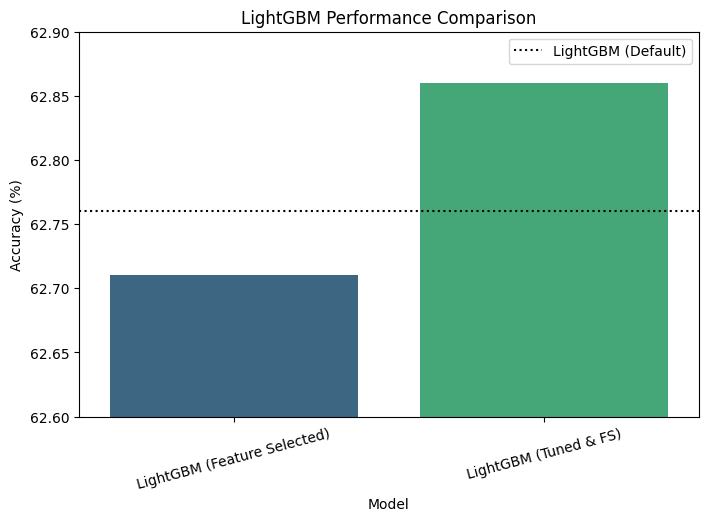

In [44]:
data = {
    'Model': [ 'LightGBM (Feature Selected)', 'LightGBM (Tuned & FS)'],
    'Accuracy': [62.71, 62.86]
}

# Create DataFrame
df = pd.DataFrame(data)

default_accuracy = 62.76

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.axhline(y=default_accuracy, color='black', linestyle='dotted', label='LightGBM (Default)')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('LightGBM Performance Comparison')
plt.ylim(62.6, 62.9)
plt.xticks(rotation=15)
plt.legend()
plt.show()

# done 😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁  

# Submission

In [45]:
FinalTest=cleanPipeline.transform(FINtest)
SlectedFinaltest=selector.transform(FinalTest)

In [46]:
prediction=lgb_model.predict(SlectedFinaltest)
prediction_df = pd.DataFrame({
    "id": range(len(prediction)),  # Generates IDs as 0, 1, 2, ...
    "target": prediction
})
prediction_df.to_csv('submission.csv',index=False)

In [47]:
prediction_df

,id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,1
9997,9997,0
9998,9998,1
